In [1]:
%matplotlib notebook
#import matplotlib.pyplot as plt
# Note! ITK interacts weirdly here.  from lazy_imports import itk does not work.
# Additionally, import itk must occur before lazy_imports for itkwidgets.view (ie itkview) to work.
import itk
import vtk
#from lazy_imports import itk
from lazy_imports import np
from lazy_imports import plt
from lazy_imports import sitk
from lazy_imports import loadmat, savemat
from lazy_imports import sio
from lazy_imports import itkwidgets
from lazy_imports import itkview
from lazy_imports import interactive
from lazy_imports import ipywidgets
from lazy_imports import pv
from lazy_imports import torch
plt.rcParams["figure.figsize"] = (6, 6) # (w, h)

In [7]:
from data.io import readRaw, ReadScalars, ReadTensors, WriteTensorNPArray, WriteScalarNPArray, readPath3D
from data.convert import GetNPArrayFromSITK, GetSITKImageFromNP
from disp.vis import show_2d

In [3]:
# from colorbrewer2, sequential 9 values pasted together YlGnBu (reverse order) then YlOrRd
# EXCEPT THESE ARE NOT PRINT FRIENDLY OR PHOTOCOPY SAFE!!!
# But skip the yellows in the middle -- too light
geo_colors = ['tab:red', 'tab:pink', 'tab:orange', 'tab:blue', 'tab:purple', 'tab:green', 'tab:cyan']
eul_colors = ['k', 'tab:gray', 'tab:brown', 'm', 'y', 'tab:olive', 'maroon']
#interp_colors = ['#081d58', '#253494', '#225ea8', '#1d91c0', '#41b6c4', '#7fcdbb', '#c7e9b4', '#edf8b1', '#ffffd9',
#                 '#ffffcc', '#ffeda0', '#fed976', '#feb24c', '#fd8d3c', '#fc4e2a', '#e31a1c', '#bd0026', '#800026']
interp_colors = ['#081d58', '#253494', '#225ea8', '#1d91c0', '#41b6c4', '#7fcdbb', '#c7e9b4',
                 '#fed976', '#feb24c', '#fd8d3c', '#fc4e2a', '#e31a1c', '#bd0026', '#800026']

blue=interp_colors[3]
ltblue=interp_colors[6]
yellow=interp_colors[7]
orange=interp_colors[9]
red=interp_colors[12]

# 3 classes are safest, but fewer options.
# Stitch together some options from sequential 3 values YlGnBu (reverse order), YlOrBr and 
#interp_colors = ['#2c7fb8', '#7fcdbb', '#edf8b1', '#fff7bc', '#fec44f', '#d95f0e']

# Compromise, use 5 class YlGnBu (reverse order) and YlOrBr again leaving out yellow
interp_colors = ['#253494', '#2c7fb8', '#41b6c4', '#a1dab4', '#fed98e', '#fe9929', '#d95f0e', '#993404']
# leave out #ffffcc and #ffffd4

blue=interp_colors[1]
ltblue=interp_colors[2]
yellow=interp_colors[4]
orange=interp_colors[5]
red=interp_colors[7]

# Same as above but with a dark gray added in the front
interp_colors = ['#777777','#253494', '#2c7fb8', '#41b6c4', '#a1dab4', '#fed98e', '#fe9929', '#d95f0e', '#993404']

blue=interp_colors[2]
ltblue=interp_colors[3]
yellow=interp_colors[5]
orange=interp_colors[6]
red=interp_colors[8]

# matches defaults
XSMALL_SIZE = 12
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
# bigger for papers
XSMALL_SIZE = 12
SMALL_SIZE = 17
MEDIUM_SIZE = 23
BIGGER_SIZE = 25

plt.rcParams["figure.figsize"] = (4, 4) # (w, h)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



# Plot some bullseyes and their mean

In [20]:
figdir = "/home/sci/kris/dissertation_figures/"
bullsdir = "/usr/sci/projects/Autism/krismz/longitudinal_bullseyes/"
indvbullsdir = f"{bullsdir}individual_predictions/"
bullimgfiles = ["Bull0_0.0_I1.mhd",
"Bull20_0.0_I1.mhd",
"Bull31_0.0_I1.mhd",
"Bull33_0.0_I1.mhd",
"Bull41_0.0_I1.mhd",
"Bull51_0.0_I1.mhd",
"Bull52_0.0_I1.mhd",
"Bull60_0.0_I1.mhd"]

bullatlasfile = "3sigma_frechet_atlas_v2_by1/age_65_atlas.mhd"

bullimgs = []
for f in bullimgfiles:
  bullimgs.append(ReadScalars(f"{indvbullsdir}{f}").squeeze())

bullatlas = ReadScalars(f"{bullsdir}{bullatlasfile}").squeeze()


In [22]:
do_save = True

<IPython.core.display.Javascript object>


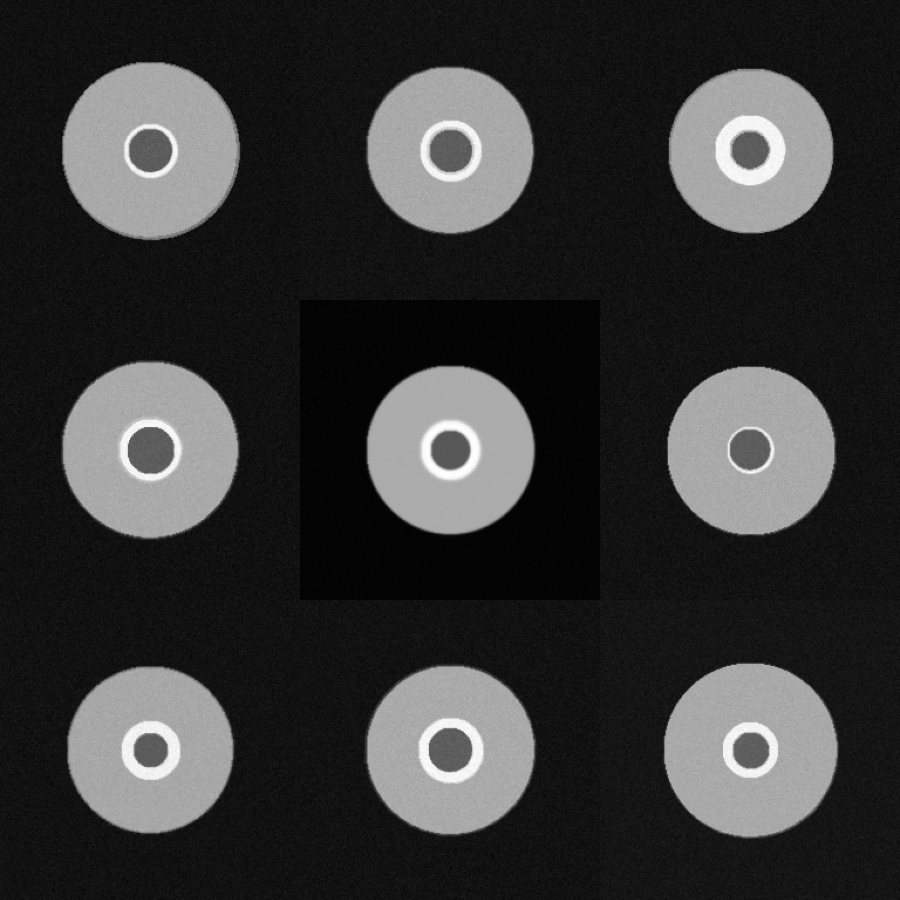

In [25]:
tens_fig=plt.figure(figsize=(9,9))
rows = 3
cols = 3 # Each individual takes 1 column and 1 row, atlas is in center square

grid = plt.GridSpec(rows, cols, top=1, bottom=0, right=1, left=0, wspace=0, hspace=0)

xsize = bullatlas.shape[0]
ysize = bullatlas.shape[1]
spacing = [0,0]
extent = (0, xsize*spacing[0], ysize*spacing[1], 0)

ax00 = plt.subplot(grid[0,0])
ax00.imshow(bullimgs[0],interpolation=None,cmap="gray")
#if not show_axis_labels:
#  ax00.set_xticks([])
#  ax00.set_yticks([])
#ax00.get_legend().remove() 
ax00.set_axis_off()
#ax00.xaxis.set_major_locator(plt.NullLocator())
#ax00.yaxis.set_major_locator(plt.NullLocator())
#ax00.set_rasterized(True)
#ax00.set_rasterization_zorder(-5)
ax01 = plt.subplot(grid[0,1])
ax01.imshow(bullimgs[1],interpolation=None,cmap="gray")
ax01.set_axis_off()

ax02 = plt.subplot(grid[0,2])
ax02.imshow(bullimgs[2],interpolation=None,cmap="gray")
ax02.set_axis_off()

ax10 = plt.subplot(grid[1,0])
ax10.imshow(bullimgs[3],interpolation=None,cmap="gray")
ax10.set_axis_off()

ax11 = plt.subplot(grid[1,1])
ax11.imshow(bullatlas,interpolation=None,cmap="gray")
ax11.set_axis_off()

ax12 = plt.subplot(grid[1,2])
ax12.imshow(bullimgs[4],interpolation=None,cmap="gray")
ax12.set_axis_off()

ax20 = plt.subplot(grid[2,0])
ax20.imshow(bullimgs[5],interpolation=None,cmap="gray")
ax20.set_axis_off()

ax21 = plt.subplot(grid[2,1])
ax21.imshow(bullimgs[6],interpolation=None,cmap="gray")
ax21.set_axis_off()

ax22 = plt.subplot(grid[2,2])
ax22.imshow(bullimgs[7],interpolation=None,cmap="gray")
ax22.set_axis_off()

if do_save:
  plt.gcf().savefig(figdir + 'bullseye_atlas.pdf', 
                    bbox_inches='tight', pad_inches=0, dpi=400, transparent=True)



In [8]:
help(show_2d)

Help on function show_2d in module disp.vis:

show_2d(img, title=None, margin=0.05, dpi=80, has_component_data=False)



In [16]:
plt.imshow(bullatlas,cmap="gray")